<a href="https://www.kaggle.com/code/vanpatangan/house-prices?scriptVersionId=217918843" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

In [2]:
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Data Exploration

In [ ]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Use list comprehension to iterate over each column
    summary = [[col, df[col].dtype, df[col].count(), df[col].nunique(), df[col].isnull().sum(), df.duplicated().sum()]
        for col in df.columns]

    # Create a DataFrame from the list of lists
    df_check = pd.DataFrame(summary, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])
    
    # Set pandas option to display all rows
    pd.set_option('display.max_rows', None)
    
    return df_check

In [ ]:
check(train)

In [ ]:
check(test)

## Distribution

In [ ]:
# Find all the Numeric Dtypes 
numeric_col_train = train.select_dtypes(include=['float64','int64'])
numeric_col_test = test.select_dtypes(include=['float64','int64'])

# Visualize to check distribution 
numeric_col_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='g');
numeric_col_test.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='b');

## Missing Values 

In [ ]:
# Find missing values
missing_val_train = train.isnull().sum()
missing_val_test = test.isnull().sum()  

# Combine missing values with dtype information
train_result = pd.concat([missing_val_train, train.dtypes], axis=1, keys=['Missing', 'Dtype'])
test_result = pd.concat([missing_val_test, test.dtypes], axis=1, keys=['Missing', 'Dtype'])

# Print results for columns with missing values
print("Train dataset:")
print(train_result[train_result['Missing'] > 0])
print("\nTest dataset:")
print(test_result[test_result['Missing'] > 0])

# Plot the sum of missing values for train data
plt.figure(figsize=(12, 3))
missing_val_train.plot(kind='bar', color='skyblue')
plt.title('Sum of Missing Values in Train DataFrame')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

# Plot the sum of missing values for test data
plt.figure(figsize=(12, 3))
missing_val_test.plot(kind='bar', color='blue')
plt.title('Sum of Missing Values in Test DataFrame') 
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()


## Correlation

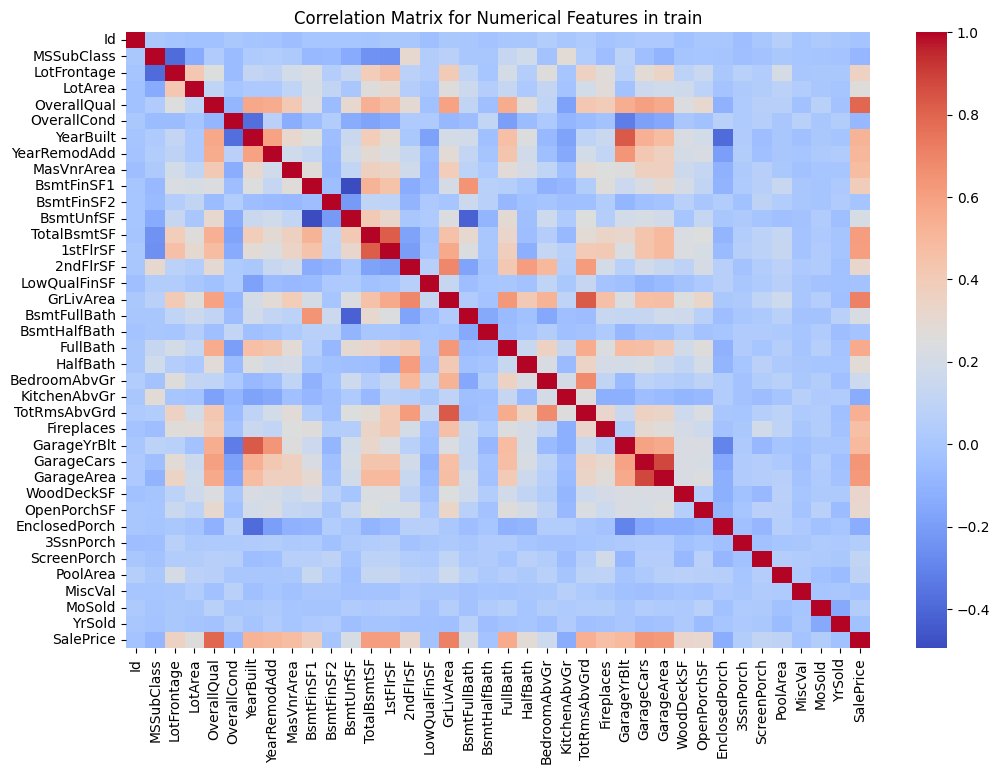

In [3]:
# Specify numerical columns in train
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for numerical features only
corr_matrix = train[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Numerical Features in train")
plt.show()

In [4]:
# Log Transform Target Column
train['SalePrice'] = np.log(train['SalePrice'])


target_column = 'SalePrice'  

# Sort by correlation with the target column
sorted_correlations = corr_matrix[target_column].sort_values(ascending=False)
print(sorted_correlations)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [ ]:
train.info()

# Handle Missing Values 

In [5]:
def fill_missing_values(df, numerical_features, categorical_features, high_missing_threshold=0.6):
    """
    Fill missing values in both numerical and categorical features.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        numerical_features (list): List of numerical feature column names.
        categorical_features (list): List of categorical feature column names.
        high_missing_threshold (float): Threshold for high missing ratio in categorical features.

    Returns:
        pd.DataFrame: The dataframe with missing values filled.
    """
    # Fill numerical features
    df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

    # Fill categorical features
    for feature in categorical_features:
        missing_ratio = df[feature].isnull().mean()
        if missing_ratio > high_missing_threshold:
            df[feature] = df[feature].notnull().astype(int)
        else:
            df[feature].fillna(df[feature].mode().iloc[0], inplace=True)

    return df


def preprocess_data(train, test, target_variable='SalePrice', drop_na=True):
    """
    Preprocess train and test dataframes.

    Parameters:
        train (pd.DataFrame): The training dataframe.
        test (pd.DataFrame): The testing dataframe.
        target_variable (str): The target variable name in the train dataframe.
        drop_na (bool): Whether to drop rows with NaN values after filling missing values.

    Returns:
        tuple: Preprocessed train and test dataframes.
    """
    # Select features
    numerical_features = train.select_dtypes(include=['int64', 'float64']).columns.drop(target_variable, errors='ignore')
    categorical_features = train.select_dtypes(include=['object', 'category']).columns

    # Fill missing values
    train = fill_missing_values(train, numerical_features, categorical_features)
    test = fill_missing_values(test, numerical_features, categorical_features)

    # Drop rows with any remaining NaN values, if specified
    if drop_na:
        train = train.dropna()
        test = test.dropna()

    # Align dataframes, excluding the target variable
    train_features = train.drop(columns=[target_variable], errors='ignore')
    test_features = test.copy()
    aligned_train, aligned_test = train_features.align(test_features, join='inner', axis=1)

    # Add the target variable back to the train dataframe
    if target_variable in train.columns:
        aligned_train[target_variable] = train[target_variable]

    return aligned_train, aligned_test


# Preprocess the data
train, test = preprocess_data(train, test)

# Feature Selection using MI 

In [11]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

train = train.copy()  # Ensure you do not modify the original dataframe

categorical_features = train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

features = train.drop(columns=['Id', 'SalePrice'])
target = train['SalePrice']

mi_scores = mutual_info_regression(features, target, random_state=42)
mi_scores = pd.Series(mi_scores, index=features.columns).sort_values(ascending=False)

print(mi_scores)

OverallQual     0.569626
Neighborhood    0.499743
GrLivArea       0.457291
GarageArea      0.366944
GarageCars      0.363020
                  ...   
PoolQC          0.000000
PoolArea        0.000000
3SsnPorch       0.000000
MoSold          0.000000
LandSlope       0.000000
Length: 79, dtype: float64


# Model

In [ ]:
submit_data = pd.DataFrame({'Id': id,
                           "SalePrice": pred.squeeze()})

submit_data.head()

In [ ]:
# Compare the training data and predicted prices from the test data
fig, ax = plt.subplots(2, figsize=(12,6))
train.plot(x="Id", y="SalePrice", ax=ax[0], title="Prices From Training Data", color='green')
submit_data.plot(x="Id", y="SalePrice", ax=ax[1], title="Prices From Model's Prediction", color='green')
ax[0].set_ylabel("SalePrice")
ax[1].set_ylabel("SalePrice")
ax[0].set_xlabel("Id")
ax[1].set_xlabel("Id")
plt.tight_layout()
plt.show()

In [ ]:
# Save the submission DataFrame to a CSV file
submit_data.to_csv("submission.csv", index=False)